In this Notebook, we're assessing model performances for all our classification models. These models include the following ML algorithms:

- Support Vector Machine (SVM)

The performance comparisons include assessing model accuracy and response time.

# 1. Configurations

## 1.1 Import Libraries

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib as matplot
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

print("Python ver: {}".format(sys.version))
print("Numpy ver: {}".format(np.__version__))
print("Pandas ver: {}".format(pd.__version__))
print("MatPlotLib ver: {}".format(matplot.__version__))
print("SeaBorn ver: {}".format(sns.__version__))
print("StatsModel ver: {}".format(sm.__version__))
print("Scipy ver: {}".format(scipy.__version__))
print("SkLearn ver: {}".format(sklearn.__version__))

Python ver: 3.9.2 (default, Feb 24 2021, 13:26:09) 
[Clang 12.0.0 (clang-1200.0.32.29)]
Numpy ver: 1.19.5
Pandas ver: 1.1.4
MatPlotLib ver: 3.3.3
SeaBorn ver: 0.11.1
StatsModel ver: 0.12.1
Scipy ver: 1.5.4
SkLearn ver: 0.24.1


## 1.2 Introduce helper functions

## 1.3 Set pre configurations

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

# 2. Data Preparation

## 2.1 Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 2.2 Split it into training and test sets

In [4]:
from sklearn.model_selection import train_test_split

trainingPercent = 0.8

y_train, y_test, X_train, X_test  = train_test_split(data["WeakLinks"], data.drop(columns=["WeakLinks"]), train_size = trainingPercent, random_state=5)

# 3. Create the Models

## 3.1 Logistic Regression

In [5]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', C=18, random_state=0)
lr.fit(X_train, y_train)
start_time = time.time()
preds_lr = lr.predict(X_test)
end_time = time.time()
accuracy_lr = accuracy_score(preds_lr, y_test)
latency_lr = (end_time - start_time) * 1000

## 3.2 k-Nearest Neighbors (kNN)

In [6]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
start_time = time.time()
preds_knn = knn.predict(X_test)
end_time = time.time()
accuracy_knn = accuracy_score(preds_knn, y_test)
latency_knn = (end_time - start_time) * 1000

## 3.3 Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, max_features='sqrt')
dt.fit(X_train, y_train)
start_time = time.time()
preds_dt = dt.predict(X_test)
end_time = time.time()
accuracy_dt = accuracy_score(preds_dt, y_test)
latency_dt = (end_time - start_time) * 1000

## 3.4 Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap='False', max_depth=10, n_estimators=200)
rf.fit(X_train, y_train)
start_time = time.time()
preds_rf = rf.predict(X_test)
end_time = time.time()
accuracy_rf = accuracy_score(preds_rf, y_test)
latency_rf = (end_time - start_time) * 1000

## 3.5 Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVC

svm = SVC(C=2, kernel='rbf',gamma=1)
svm.fit(X_train, y_train)
start_time = time.time()
preds_svm = svm.predict(X_test)
end_time = time.time()
accuracy_svm = accuracy_score(preds_svm, y_test)
latency_svm = (end_time - start_time) * 1000

# 4. Assessing Model Performances

## 4.1 Model Accuracies

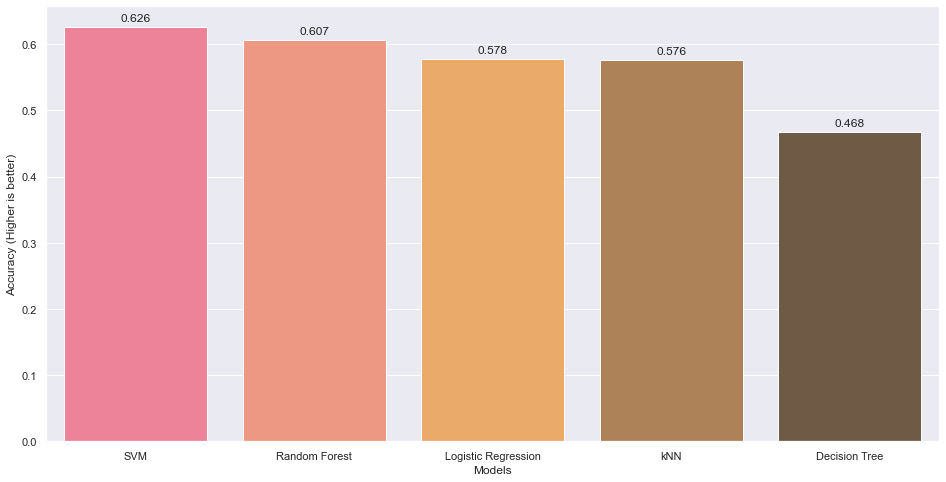

In [10]:
results = pd.DataFrame({
    "Accuracy":[
        accuracy_lr,
        accuracy_knn,
        accuracy_dt,
        accuracy_rf,
        accuracy_svm
    ],
    "Models":[
        "Logistic Regression",
        "kNN",
        "Decision Tree",
        "Random Forest",
        "SVM"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="spring_d")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (Higher is better)")

plt.show()

## Benchmarking Response Times

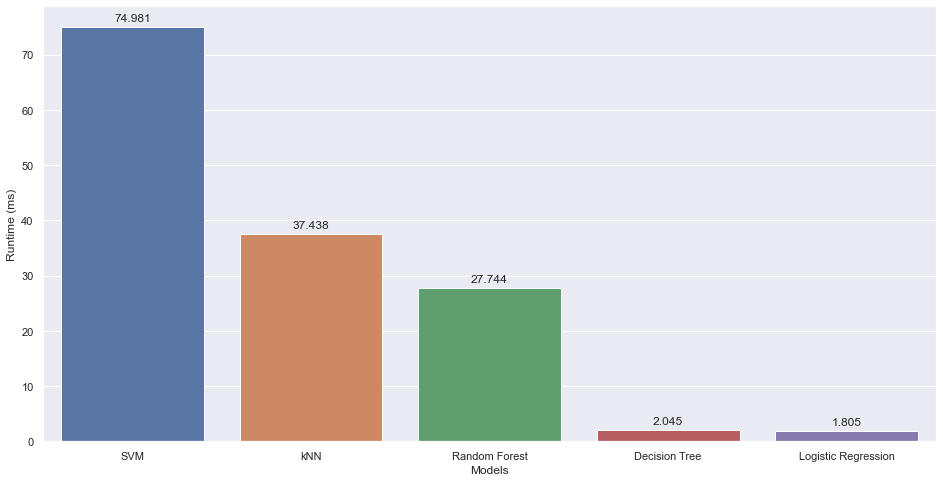

In [11]:
results = pd.DataFrame({
    "Runtime":[
        latency_lr,
        latency_knn,
        latency_dt,
        latency_rf,
        latency_svm
    ],
    "Models":[
        "Logistic Regression",
        "kNN",
        "Decision Tree",
        "Random Forest",
        "SVM"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()